In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/shibangshu-pal/DataScienceCourse-Major-Project-1/main/House_Rent_Dataset.csv')
# accessing the csv dataset from GitHub
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0 out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
import numpy as np
df_floor = np.array(df.iloc[:4746,3].values)
floors = []
for i in df_floor:
    c=''
    for j in i:
      if j!=' ':
        c = c+j
      else: 
        break
    floors.append(int(c))
#floors array stores the data of the floor in which the flat is situated in

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 408.0+ KB


In [ ]:
furnishing = []
#0 for unfurnished
#1 for semi-furnished
#2 for fully furnished
fur = df.iloc[:4746,7].values
for i in fur:
  if i == 'Unfurnished':
    furnishing.append(0)
  elif i == 'Semi-Furnished':
    furnishing.append(1)
  else:
    furnishing.append(2)
#furnishing array grades the flats on type of furnishing

In [ ]:
city = np.array(df.iloc[:,6].values)
#array containing cities

In [ ]:
bhk = np.array(df.iloc[:,0].values) 
b_room = np.array(df.iloc[:,9].values)
#bhk - stores the bhk of the apartment
#b_room - stores the number of bathrooms in the apartment

In [ ]:
#storing rent
rent = np.array(df.iloc[:,1].values)

In [ ]:
p = np.array(df['City'].unique())
p

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Price city wise')

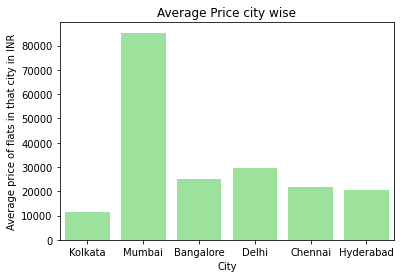

In [ ]:
#Exploratory Data Analysis 
#1. We calculate the average rent of flats in the cities
import matplotlib.pyplot as plt
import seaborn as sns

avg = [0,0,0,0,0,0]
counter = [0,0,0,0,0,0]
#the locations respectively stand for Kolkata, Mumbai, Bangalore, Delhi, Chennai and Hyderabad respectively
for i in range(0,4746):
  if city[i] == 'Kolkata':
        avg[0] += rent[i]
        counter[0] += 1
  elif city[i] == 'Mumbai':
        avg[1] += rent[i]
        counter[1] += 1
  elif city[i] == 'Bangalore':
        avg[2] += rent[i]
        counter[2] += 1
  elif city[i] == 'Delhi':
        avg[3] += rent[i]
        counter[3] += 1
  elif city[i] == 'Chennai':
        avg[4] += rent[i]
        counter[4] += 1
  else:
        avg[5] += rent[i]
        counter[5] += 1

for j in range(0,6):
  avg[j] = round(avg[j]/counter[j],2)

#print("The average in various cities are ",avg)

sns.barplot(p,avg, color= 'lightgreen')
plt.xlabel("City")
plt.ylabel("Average price of flats in that city in INR")
plt.title("Average Price city wise")

In [ ]:
# 2. We calculate the average price of various BHK flats in the cities
bhk_uni = np.array(df['BHK'].unique())
bhk_uni = np.sort(bhk_uni)
#print(bhk_uni)
bhk_calc = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
counter = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
for i in range(4746):
  if city[i] == 'Kolkata':
    if bhk[i] == 1:
      bhk_calc[0][0]+=rent[i]
      counter[0][0]+=1
    elif bhk[i] == 2:
      bhk_calc[0][1]+=rent[i]
      counter[0][1]+=1
    elif bhk[i] == 3:
      bhk_calc[0][2]+=rent[i]
      counter[0][2]+=1
    elif bhk[i] == 4:
      bhk_calc[0][3]+=rent[i]
      counter[0][3]+=1
    elif bhk[i] == 5:
      bhk_calc[0][4]+=rent[i]
      counter[0][4]+=1
    else:
      bhk_calc[0][5]+=rent[i]
      counter[0][5]+=1
  elif city[i] == 'Mumbai':
    if bhk[i] == 1:
      bhk_calc[1][0]+=rent[i]
      counter[1][0]+=1
    elif bhk[i] == 2:
      bhk_calc[1][1]+=rent[i]
      counter[1][1]+=1
    elif bhk[i] == 3:
      bhk_calc[1][2]+=rent[i]
      counter[1][2]+=1
    elif bhk[i] == 4:
      bhk_calc[1][3]+=rent[i]
      counter[1][3]+=1
    elif bhk[i] == 5:
      bhk_calc[1][4]+=rent[i]
      counter[1][4]+=1
    else:
      bhk_calc[1][5]+=rent[i]
      counter[1][5]+=1
  elif city[i] == 'Bangalore':
    if bhk[i] == 1:
      bhk_calc[2][0]+=rent[i]
      counter[2][0]+=1
    elif bhk[i] == 2:
      bhk_calc[2][1]+=rent[i]
      counter[2][1]+=1
    elif bhk[i] == 3:
      bhk_calc[2][2]+=rent[i]
      counter[2][2]+=1
    elif bhk[i] == 4:
      bhk_calc[2][3]+=rent[i]
      counter[2][3]+=1
    elif bhk[i] == 5:
      bhk_calc[2][4]+=rent[i]
      counter[2][4]+=1
    else:
      bhk_calc[2][5]+=rent[i]
      counter[2][5]+=1
  elif city[i] == 'Delhi':
    if bhk[i] == 1:
      bhk_calc[3][0]+=rent[i]
      counter[3][0]+=1
    elif bhk[i] == 2:
      bhk_calc[3][1]+=rent[i]
      counter[3][1]+=1
    elif bhk[i] == 3:
      bhk_calc[3][2]+=rent[i]
      counter[3][2]+=1
    elif bhk[i] == 4:
      bhk_calc[3][3]+=rent[i]
      counter[3][3]+=1
    elif bhk[i] == 5:
      bhk_calc[3][4]+=rent[i]
      counter[3][4]+=1
    else:
      bhk_calc[3][5]+=rent[i]
      counter[3][5]+=1
  elif city[i] == 'Chennai':
    if bhk[i] == 1:
      bhk_calc[4][0]+=rent[i]
      counter[4][0]+=1
    elif bhk[i] == 2:
      bhk_calc[4][1]+=rent[i]
      counter[4][1]+=1
    elif bhk[i] == 3:
      bhk_calc[4][2]+=rent[i]
      counter[4][2]+=1
    elif bhk[i] == 4:
      bhk_calc[4][3]+=rent[i]
      counter[4][3]+=1
    elif bhk[i] == 5:
      bhk_calc[4][4]+=rent[i]
      counter[4][4]+=1
    else:
      bhk_calc[4][5]+=rent[i]
      counter[4][5]+=1
  else:
    if bhk[i] == 1:
      bhk_calc[5][0]+=rent[i]
      counter[5][0]+=1
    elif bhk[i] == 2:
      bhk_calc[5][1]+=rent[i]
      counter[5][1]+=1
    elif bhk[i] == 3:
      bhk_calc[5][2]+=rent[i]
      counter[5][2]+=1
    elif bhk[i] == 4:
      bhk_calc[5][3]+=rent[i]
      counter[5][3]+=1
    elif bhk[i] == 5:
      bhk_calc[5][4]+=rent[i]
      counter[5][4]+=1
    else:
      bhk_calc[5][5]+=rent[i]
      counter[5][5]+=1
for i in range(6):
  for j in range(6):
    if counter[i][j]!=0:
      bhk_calc[i][j] = bhk_calc[i][j]/counter[i][j]

In [ ]:
p1 = np.array(df['Furnishing Status'].unique())
p1

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

Text(0, 0.5, 'Average price in INR')

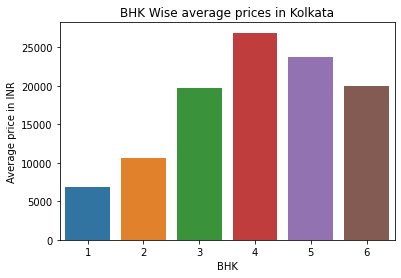

In [ ]:
sns.barplot(bhk_uni,bhk_calc[0])
plt.title('BHK Wise average prices in Kolkata')
plt.xlabel('BHK')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

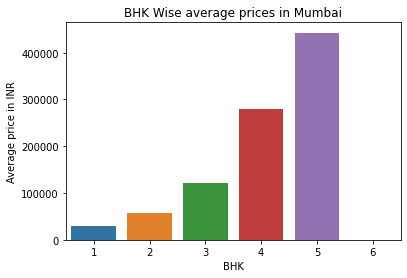

In [ ]:
sns.barplot(bhk_uni,bhk_calc[1])
plt.title('BHK Wise average prices in Mumbai')
plt.xlabel('BHK')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

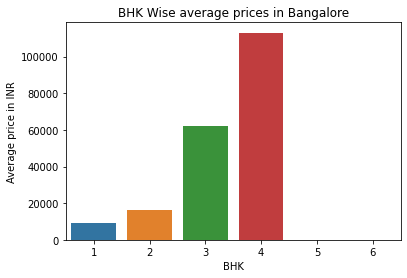

In [ ]:
sns.barplot(bhk_uni,bhk_calc[2])
plt.title('BHK Wise average prices in Bangalore')
plt.xlabel('BHK')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

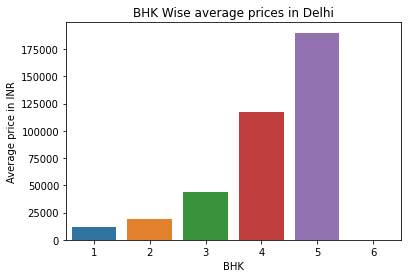

In [ ]:
sns.barplot(bhk_uni,bhk_calc[3])
plt.title('BHK Wise average prices in Delhi')
plt.xlabel('BHK')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

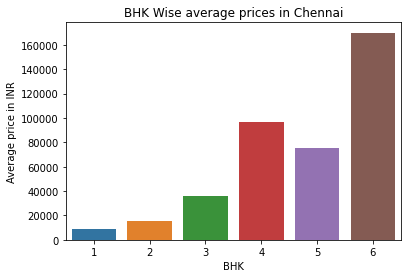

In [ ]:
sns.barplot(bhk_uni,bhk_calc[4])
plt.title('BHK Wise average prices in Chennai')
plt.xlabel('BHK')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

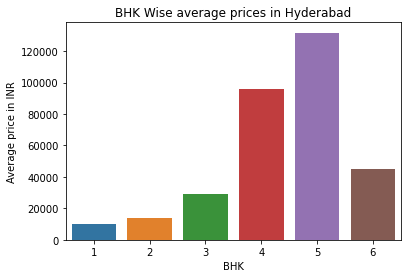

In [ ]:
sns.barplot(bhk_uni,bhk_calc[5])
plt.title('BHK Wise average prices in Hyderabad')
plt.xlabel('BHK')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of various BHK flats avaliable for rent in Kolkata')

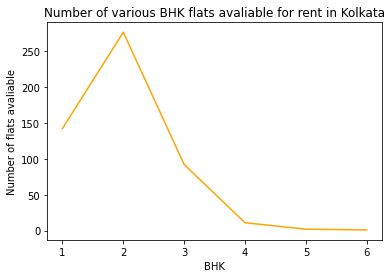

In [ ]:
#EDA
#2. BHK Wise distribution of flats in various cities
plt.xlabel('BHK')
plt.ylabel('Number of flats avaliable')
sns.lineplot(bhk_uni,counter[0],color ='orange')
plt.title('Number of various BHK flats avaliable for rent in Kolkata')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of various BHK flats avaliable for rent in Mumbai')

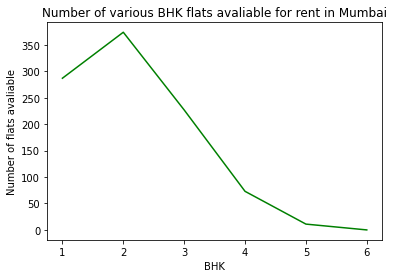

In [ ]:
plt.xlabel('BHK')
plt.ylabel('Number of flats avaliable')
sns.lineplot(bhk_uni,counter[1],color ='green')
plt.title('Number of various BHK flats avaliable for rent in Mumbai')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of various BHK flats avaliable for rent in Bangalore')

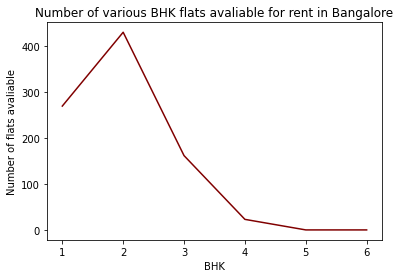

In [ ]:
plt.xlabel('BHK')
plt.ylabel('Number of flats avaliable')
sns.lineplot(bhk_uni,counter[2],color ='maroon')
plt.title('Number of various BHK flats avaliable for rent in Bangalore')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of various BHK flats avaliable for rent in Delhi')

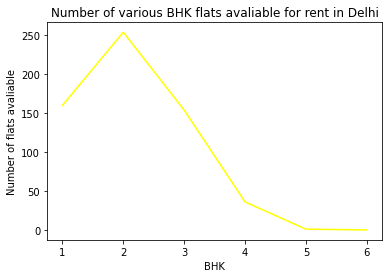

In [ ]:
plt.xlabel('BHK')
plt.ylabel('Number of flats avaliable')
sns.lineplot(bhk_uni,counter[3],color ='yellow')
plt.title('Number of various BHK flats avaliable for rent in Delhi')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of various BHK flats avaliable for rent in Chennai')

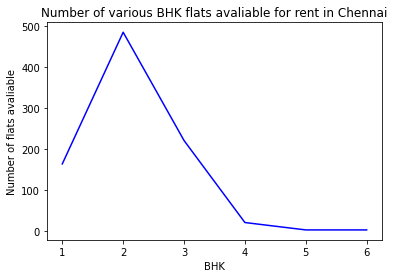

In [ ]:
plt.xlabel('BHK')
plt.ylabel('Number of flats avaliable')
sns.lineplot(bhk_uni,counter[4],color ='blue')
plt.title('Number of various BHK flats avaliable for rent in Chennai')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of various BHK flats avaliable for rent in Hyderabad')

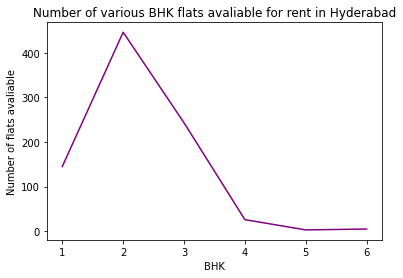

In [ ]:
plt.xlabel('BHK')
plt.ylabel('Number of flats avaliable')
sns.lineplot(bhk_uni,counter[5],color ='purple')
plt.title('Number of various BHK flats avaliable for rent in Hyderabad')

In [ ]:
#Exploratory Data Analysis
#4. We calculate the average pricing of various types of furnished apartments across the various cities
bhk_calc = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
counter = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for i in range(4746):
  if city[i] == 'Kolkata':
    if furnishing[i] == 0:
      bhk_calc[0][0]+=rent[i]
      counter[0][0]+=1
    elif furnishing[i] == 1:
      bhk_calc[0][1]+=rent[i]
      counter[0][1]+=1
    else:
      bhk_calc[0][2]+=rent[i]
      counter[0][2]+=1
    
  elif city[i] == 'Mumbai':
    if furnishing[i] == 0:
      bhk_calc[1][0]+=rent[i]
      counter[1][0]+=1
    elif furnishing[i] == 1:
      bhk_calc[1][1]+=rent[i]
      counter[1][1]+=1
    else:
      bhk_calc[1][2]+=rent[i]
      counter[1][2]+=1
    
  elif city[i] == 'Bangalore':
    if furnishing[i] == 0:
      bhk_calc[2][0]+=rent[i]
      counter[2][0]+=1
    elif furnishing[i] == 1:
      bhk_calc[2][1]+=rent[i]
      counter[2][1]+=1
    else:
      bhk_calc[2][2]+=rent[i]
      counter[2][2]+=1
    
  elif city[i] == 'Delhi':
    if furnishing[i] == 0:
      bhk_calc[3][0]+=rent[i]
      counter[3][0]+=1
    elif furnishing[i] == 1:
      bhk_calc[3][1]+=rent[i]
      counter[3][1]+=1
    else:
      bhk_calc[3][2]+=rent[i]
      counter[3][2]+=1
  elif city[i] == 'Chennai':
    if furnishing[i] == 0:
      bhk_calc[4][0]+=rent[i]
      counter[4][0]+=1
    elif furnishing[i] == 1:
      bhk_calc[4][1]+=rent[i]
      counter[4][1]+=1
    else:
      bhk_calc[4][2]+=rent[i]
      counter[4][2]+=1
  else:
    if furnishing[i] == 0:
      bhk_calc[5][0]+=rent[i]
      counter[5][0]+=1
    elif furnishing[i] == 1:
      bhk_calc[5][1]+=rent[i]
      counter[5][1]+=1
    else:
      bhk_calc[5][2]+=rent[i]
      counter[5][2]+=1
    
for i in range(3):
  for j in range(3):
    if counter[i][j]!=0:
      bhk_calc[i][j] = bhk_calc[i][j]/counter[i][j]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

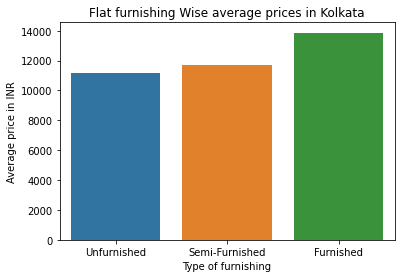

In [ ]:
sns.barplot(p1,bhk_calc[0])
plt.title('Flat furnishing Wise average prices in Kolkata')
plt.xlabel('Type of furnishing')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

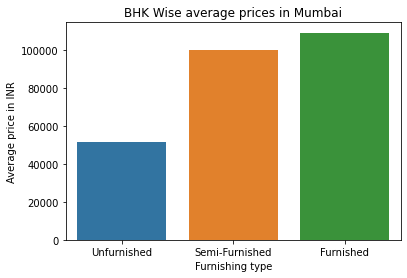

In [ ]:
sns.barplot(p1,bhk_calc[1])
plt.title('BHK Wise average prices in Mumbai')
plt.xlabel('Furnishing type')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

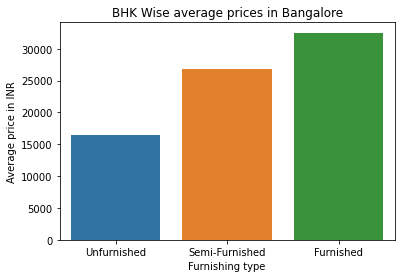

In [ ]:
sns.barplot(p1,bhk_calc[2])
plt.title('BHK Wise average prices in Bangalore')
plt.xlabel('Furnishing type')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

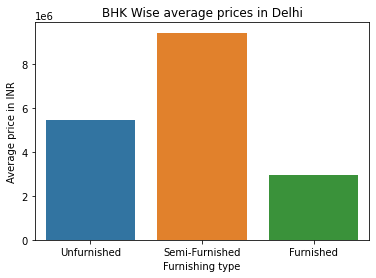

In [ ]:
sns.barplot(p1,bhk_calc[3])
plt.title('BHK Wise average prices in Delhi')
plt.xlabel('Furnishing type')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

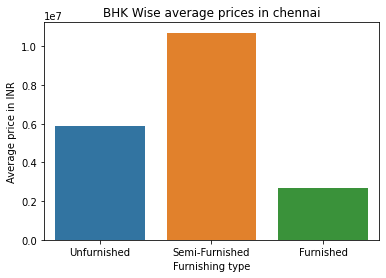

In [ ]:
sns.barplot(p1,bhk_calc[4])
plt.title('BHK Wise average prices in chennai')
plt.xlabel('Furnishing type')
plt.ylabel('Average price in INR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average price in INR')

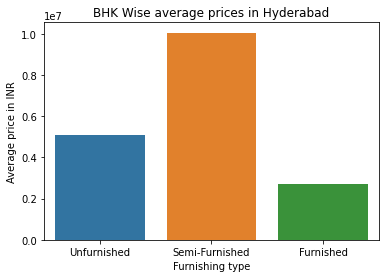

In [ ]:
sns.barplot(p1,bhk_calc[5])
plt.title('BHK Wise average prices in Hyderabad')
plt.xlabel('Furnishing type')
plt.ylabel('Average price in INR')

In [ ]:
print(bhk.shape)
print(df_floor.shape)
print(city.shape)
print(b_room.shape)

(4746,)
(4746,)
(4746,)
(4746,)


In [ ]:
#Start of Model building

In [ ]:
df2 = df
del df2['Area Locality']
del df2['Area Type']
del df2['Tenant Preferred']
del df2['Point of Contact']
del df2['Size']

In [ ]:
#Editing df2 database to give integer values to certain fields


In [ ]:
arr= []
for i in range(4746):
  if(city[i]=='Kolkata'):
    arr.append([bhk[i],floors[i],furnishing[i],0,b_room[i],rent[i]])
  elif(city[i]=='Mumbai'):
    arr.append([bhk[i],floors[i],furnishing[i],1,b_room[i],rent[i]])
  elif(city[i]=='Bangalore'):
    arr.append([bhk[i],floors[i],furnishing[i],2,b_room[i],rent[i]])
  elif(city[i]=='Delhi'):
    arr.append([bhk[i],floors[i],furnishing[i],3,b_room[i],rent[i]])
  elif(city[i]=='Chennai'):
    arr.append([bhk[i],floors[i],furnishing[i],4,b_room[i],rent[i]])
  else:
    arr.append([bhk[i],floors[i],furnishing[i],5,b_room[i],rent[i]])


In [ ]:
# We will use df_res for our final ML model as we are not considering the rest of the columns
df_res = pd.DataFrame(data = arr, columns = ['BHK','Floor No.','Furnishing','City','Bathroom','Rent'])
df_res

,BHK,Floor No.,Furnishing,City,Bathroom,Rent
0,2,0,0,0,2,10000
1,2,1,1,0,1,20000
2,2,1,1,0,1,17000
3,2,1,0,0,1,10000
4,2,1,0,0,1,7500
...,...,...,...,...,...,...
4741,2,3,1,5,2,15000
4742,3,1,1,5,3,29000
4743,3,3,1,5,3,35000
4744,3,23,1,5,2,45000


In [ ]:
#Preparation for application of ML Model
#input - BHK, floor location, city, number of bathrooms
#output - rent
x = df_res.iloc[:,:5].values    #input
y = df_res.iloc[:,5].values          #output
#training and testing variables
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state = 0)

#Normalisation
#Normalisation reducing the accuracy even further leading to worse output so avoided

#Application of Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Getting output from model
y_pred = model.predict(x_test)
y_pred

array([18000, 15000, 15000, ..., 15000, 15000, 15000])

In [ ]:
#individual prediction
#BHK,floor,furnishing,city,bathroom
inp =[]
print('Input values for the following fields')
a1 = (int)(input('Enter the required number of BHK\n'))
inp.append(a1)
a2 =(int)(input('Enter the floor number in which you would like to have your flat in, eg. 0 for ground,1 for first,2 for second and so on..\n'))
inp.append(a2)
a3 = (int)(input('Enter the type of furnishing: \n 0 for unfurnished\n 1 for semi-furnished\n 2 for furnished\n'))
inp.append(a3)
a4 = (int)(input('Enter the City location:\n0 for Kolkata\n1 for Mumbai\n2 for Bangalore\n3 for Delhi\n4 for Chennai\n5 for Hyderabad\n'))
inp.append(a4)
a5 = (int)(input('Enter the required number of bathrooms\n'))
inp.append(a5)
y = model.predict([inp]) #input must be 2 dimensional
print('The possible rent as predicted by our model is INR ',y[0])

Input values for the following fields
Enter the required number of BHK
1
Enter the floor number in which you would like to have your flat in, eg. 0 for ground,1 for first,2 for second and so on..
3
Enter the type of furnishing: 
 0 for unfurnished
 1 for semi-furnished
 2 for furnished
2
Enter the City location:
0 for Kolkata
1 for Mumbai
2 for Bangalore
3 for Delhi
4 for Chennai
5 for Hyderabad
1
Enter the required number of bathrooms
2
The possible rent as predicted by our model is INR  20000


In [ ]:
model.predict([[1,3,2,1,1]])  # 1 BHK in Third floor, furnished in Mumbai with 1 bathroom

array([18000])

In [ ]:
#finding the accuracy percentage
from sklearn.metrics import accuracy_score
print('The accuracy of the model in percentage was',accuracy_score(y_pred,y_test)*100)

The accuracy of the model in percentage was 6.571187868576242
